# Libraries

## Numpy

Numpy and the numpy linalg library can be used to represent vectors, matrices and do linear algebra operations.

In [1]:
import numpy as np

We can easily define vectors and matrices:

In [2]:
v = np.array([1, 3])

In [3]:
v

array([1, 3])

In [4]:
M = np.array([
    [1, 2],
    [3, 4]
])

In [5]:
M

array([[1, 2],
       [3, 4]])

We can access elements of an existing matrix like this:

In [6]:
M[0,1]

2

Shape of a matrix:

In [7]:
M.shape

(2, 2)

Matrix / vector products:

In [8]:
M.dot(M)

array([[ 7, 10],
       [15, 22]])

In [9]:
M.dot(v)

array([ 7, 15])

In [10]:
v.dot(v)

10

Transpose:

In [11]:
M.transpose()

array([[1, 3],
       [2, 4]])

Inverse:

In [12]:
np.linalg.inv(M)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Many other operations can be done. Use the documentation if needed: https://numpy.org/doc/

Or more generally, simply use Google / Stackoverflow.

## Matplotlib

Matplotlib is very convenient to plot figures with Python or in a Jupyter Notebook.

In [13]:
import matplotlib.pyplot as plt
# This line is necessary to use matplotlib in a Jupyter Notebook:
%matplotlib inline

In [14]:
# We can use numpy to generate data
X = np.arange(0, 10, 0.5) # generate points spaced by 0.5 from 0 to 10 (excluded)
Y = np.sin(X)

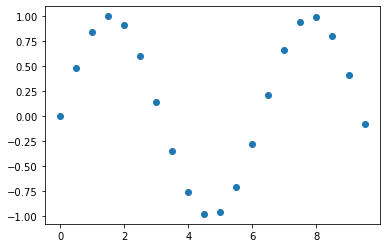

In [15]:
plt.scatter(X, Y)

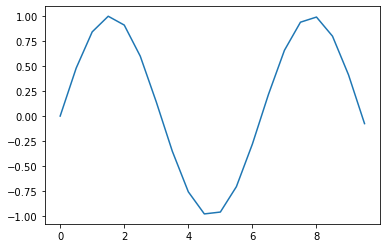

In [16]:
plt.plot(X, Y)
plt.show()

We can also generate random points

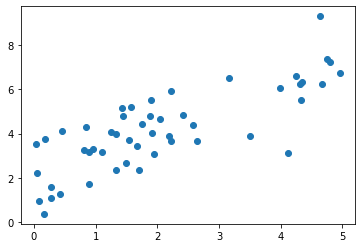

In [17]:
X = np.random.uniform(0,5,size=50) # 50 numbers uniformly sampled in [0,5]
noise = np.random.normal(2,1,size=50) # 50 numbers sampled from a normal distribution with mean 2 and standard deviation 1
Y = X + noise
plt.scatter(X, Y)

If you run several times the two cells above, you will notice that new points are generated every time. If we want to generate random numbers but still be able to reproduce the results, we can use a *seed*

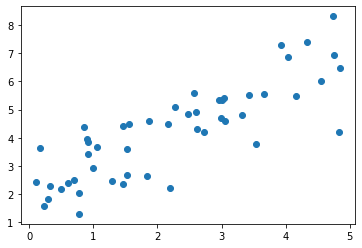

In [18]:
np.random.seed(42)
X = np.random.uniform(0,5,size=50) # 50 numbers uniformly sampled in [0,5]
noise = np.random.normal(2,1,size=50) # 50 numbers sampled from a normal distribution with mean 2 and standard deviation 1
Y = X + noise
plt.scatter(X, Y)

Now if you run the cell above several times but keep the same seed (42), the generated points stay the same. You can use another seed if you want to generated different points.

# Under and overfitting

Let's define a "ground-truth" function f(x) = x * sin(x), and plot it on [0,10]

In [19]:
def f(x):
    return np.sin(x) / x

In [20]:
X_f = np.arange(1,10,0.1)
Y_f = f(X_f)

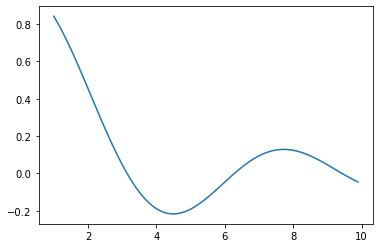

In [21]:
plt.plot(X_f,Y_f)
plt.show()

Let's randomly sample N points from this function, and create corresponding labels while adding some random noise.

In [22]:
np.random.seed(42)
N = 12
points = np.random.uniform(1, 10, size=N)
noise = np.random.randn(N)
labels = f(points) + 0.1 * noise

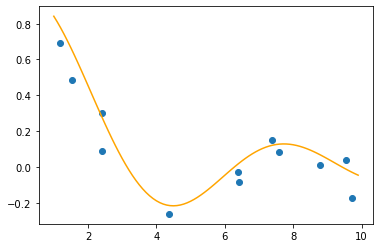

In [23]:
plt.plot(X_f,Y_f,color='orange')
plt.scatter(points, labels)
plt.show()

We will now assume we do not know the ground truth function. We will instead use the sampled points as training examples to try to predict the corresponding labels, and try to fit a polynomial curve.

For now, we will use all the points as training examples.

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def get_polynomial_coefficients(points, labels, degree=3):
    """Return the coefficients of the d-degree polynomial which best matches
    the curve represented by (points, labels)"""
    polyfeatures = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    points_poly = polyfeatures.fit_transform(points.reshape(-1,1))
    lr.fit(points_poly, labels)
    return lr.coef_

You can use the Polynomial class from numpy if you want:

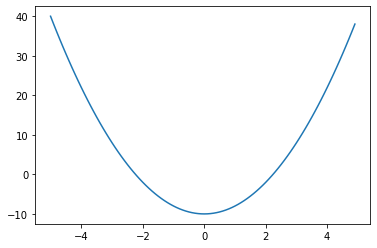

In [25]:
from numpy.polynomial.polynomial import Polynomial
poly = Polynomial([-10,0,2]) # represents function f(x) = 2*x^2 - 10
X = np.arange(-5, 5, 0.1)
Y = poly(X)
plt.plot(X, Y)
plt.show()

**Try to fit polynomials of varying degrees to the training points and labels, and show the resulting plot**

Example with a polynomial of degree "super 0", i.e. the function f(x) = 0:

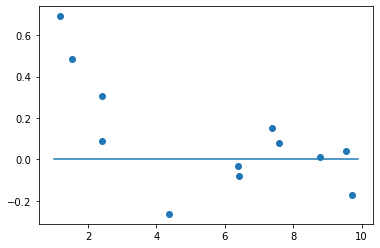

In [26]:
predictions = 0 * X_f
plt.plot(X_f,predictions)
plt.scatter(points, labels)
plt.show()

In [27]:
#Calculating the coefficients for polynomials of different degrees
new_coef_1 = get_polynomial_coefficients(points, labels, degree=1)
new_coef_2 = get_polynomial_coefficients(points, labels, degree=2)
new_coef_3 = get_polynomial_coefficients(points, labels, degree=3)
new_coef_5 = get_polynomial_coefficients(points, labels, degree=5)
new_coef_7 = get_polynomial_coefficients(points, labels, degree=7)
new_coef_10 = get_polynomial_coefficients(points, labels, degree=10)
new_coef_15 = get_polynomial_coefficients(points, labels, degree=15)

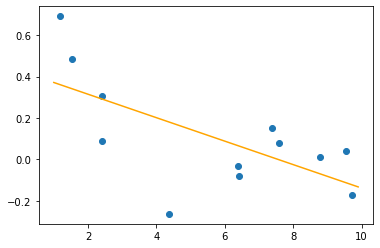

In [28]:
poly = Polynomial(new_coef_1)
X = np.arange(1, 10, 0.1)
Y = poly(X)
plt.plot(X, Y,color='orange')
plt.scatter(points, labels)
plt.show()

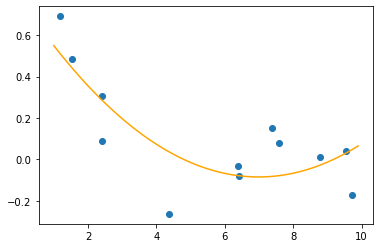

In [29]:
poly = Polynomial(new_coef_2)
X = np.arange(1, 10, 0.1)
Y = poly(X)
plt.plot(X, Y,color='orange')
plt.scatter(points, labels)
plt.show()

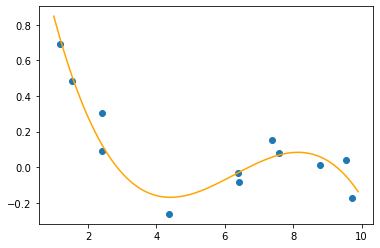

In [30]:
poly = Polynomial(new_coef_3)
X = np.arange(1, 10, 0.1)
Y = poly(X)
plt.plot(X, Y,color='orange')
plt.scatter(points, labels)
plt.show()

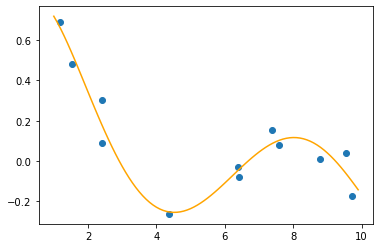

In [31]:
poly = Polynomial(new_coef_5)
X = np.arange(1, 10, 0.1)
Y = poly(X)
plt.plot(X, Y,color='orange')
plt.scatter(points, labels)
plt.show()

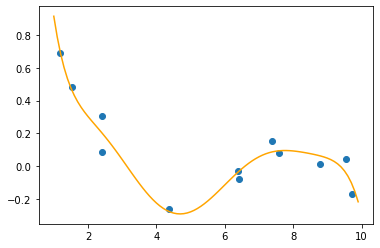

In [32]:
poly = Polynomial(new_coef_7)
X = np.arange(1, 10, 0.1)
Y = poly(X)
plt.plot(X, Y,color='orange')
plt.scatter(points, labels)
plt.show()

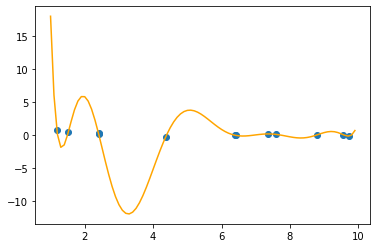

In [33]:
poly = Polynomial(new_coef_10)
X = np.arange(1, 10, 0.1)
Y = poly(X)
plt.plot(X, Y,color='orange')
plt.scatter(points, labels)
plt.show()

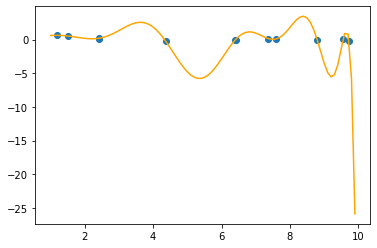

In [34]:
poly = Polynomial(new_coef_15)
X = np.arange(1, 10, 0.1)
Y = poly(X)
plt.plot(X, Y,color='orange')
plt.scatter(points, labels)
plt.show()

**Which degree seem to yield the lowest training error?**

**Which degree seem to intuitively be the most relevant match?**

- Degree 15 seems to yield the lowest training error
- Degree 5 seems to be the most relevant match (the one that has the closest similarity to the ground truth function)

**Compute the training error using the least square loss for polynomials of different degrees (for instance 2, 3, 5, 10, 15...). Does this match your estimate of the polynomial with lowest training error?**

In [35]:
def calc_error(new_coef, points, labels):
    size = len(points)
    poly = Polynomial(new_coef)
    Estimated_labels = poly(points)
    sum_prev = 0
    for i in range(0,size):
        sum_prev += (labels[i]-Estimated_labels[i])**2    
    training_cost = sum_prev/size
    return training_cost

In [36]:
training_error_1 = calc_error(new_coef_1, points, labels)
training_error_2 = calc_error(new_coef_2, points, labels)
training_error_3 = calc_error(new_coef_3, points, labels)
training_error_5 = calc_error(new_coef_5, points, labels)
training_error_7 = calc_error(new_coef_7, points, labels)
training_error_10 = calc_error(new_coef_10, points, labels)
training_error_15 = calc_error(new_coef_15, points, labels)

print('training_error_1 =', training_error_1)
print('training_error_2 =', training_error_2)
print('training_error_3 =', training_error_3)
print('training_error_5 =', training_error_5)
print('training_error_7 =', training_error_7)
print('training_error_10 =', training_error_10)
print('training_error_15 =', training_error_15)

training_error_1 = 0.03807321383862155
training_error_2 = 0.02461520603003564
training_error_3 = 0.00606239751674498
training_error_5 = 0.0044452181038654925
training_error_7 = 0.003686083457176638
training_error_10 = 0.002049634813886768
training_error_15 = 0.0036639522792390193


- It kind of match my estimate because in general the higher the degree the lower the training error. However, for this particular case, degree 10 yields the lowest training error and not degree 15

**Now sample some *new* points from the ground truth function, similarly to how the training points where sampled.**

In [37]:
#Sampling new points
np.random.seed(100)
N_test = 12
points_test = np.random.uniform(1, 10, size=N_test)
noise_test = np.random.randn(N_test)
labels_test = f(points_test) + 0.1 * noise_test

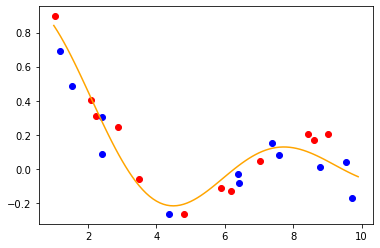

In [38]:
plt.plot(X_f,Y_f,color='orange')
plt.scatter(points, labels, color='blue')
plt.scatter(points_test, labels_test, color='red')
plt.show()

In [39]:
test_error_1 = calc_error(new_coef_1, points_test, labels_test)
test_error_2 = calc_error(new_coef_2, points_test, labels_test)
test_error_3 = calc_error(new_coef_3, points_test, labels_test)
test_error_5 = calc_error(new_coef_5, points_test, labels_test)
test_error_7 = calc_error(new_coef_7, points_test, labels_test)
test_error_10 = calc_error(new_coef_10, points_test, labels_test)
test_error_15 = calc_error(new_coef_15, points_test, labels_test)

In [40]:
print("Coefficient 1:")
print('training_error_1 =', training_error_1)
print('test_error_1 =', test_error_1)
print("\n")
print("Coefficient 2:")
print('training_error_2 =', training_error_2)
print('test_error_2 =', test_error_2)
print("\n")
print("Coefficient 3:")
print('training_error_3 =', training_error_3)
print('test_error_3 =', test_error_3)
print("\n")
print("Coefficient 5:")
print('training_error_5 =', training_error_5)
print('test_error_5 =', test_error_5)
print("\n")
print("Coefficient 7:")
print('training_error_7 =', training_error_7)
print('test_error_7 =', test_error_7)
print("\n")
print("Coefficient 10:")
print('training_error_10 =', training_error_10)
print('test_error_10 =', test_error_10)
print("\n")
print("Coefficient 15:")
print('training_error_15 =', training_error_15)
print('test_error_15 =', test_error_15)

Coefficient 1:
training_error_1 = 0.03807321383862155
test_error_1 = 0.06902106472072474


Coefficient 2:
training_error_2 = 0.02461520603003564
test_error_2 = 0.034107383867490355


Coefficient 3:
training_error_3 = 0.00606239751674498
test_error_3 = 0.015307005754528877


Coefficient 5:
training_error_5 = 0.0044452181038654925
test_error_5 = 0.013399846767347632


Coefficient 7:
training_error_7 = 0.003686083457176638
test_error_7 = 0.008819840071246175


Coefficient 10:
training_error_10 = 0.002049634813886768
test_error_10 = 31.5625481132158


Coefficient 15:
training_error_15 = 0.0036639522792390193
test_error_15 = 5.538812764326022


**Interpret this in term of overfitting, underfitting etc**

- With 1 coefficient ->   Underfitting: High Training Error and High Test Error
- With 2 coefficients ->  Underfitting: High Training Error and High Test Error
- With 3 coefficients ->  About Right:   Low Training Error and Low Test Error
- With 5 coefficients ->  About Right:   Low Training Error and Low Test Error
- With 7 coefficients ->  Just Right:    Low Training Error and Low Test Error
- With 10 coefficients -> Overfitting:   Low Training Error and High Test Error
- With 15 coefficients -> Overfitting:   Low Training Error and High Test Error

# Linear regression

Now we will implement two ways to do linear regression. We will generate some data (area and age) for houses, and try to predict their price.

We will start by generating N training points and labels.

In [41]:
np.random.seed(42)
N = 50
house_area = np.random.uniform(50,300,size=N)
house_age = np.random.uniform(0,150,size=N)
noise = np.random.normal(10, 5,size=N)
house_price = 1.1 * house_area - 0.5 * house_age + noise # the price is assumed to be in k€

In [42]:
training_data = np.concatenate([house_age.reshape(-1,1), house_area.reshape(-1,1)], axis=1)

Let's visualize the relation between the target and each individual variable.

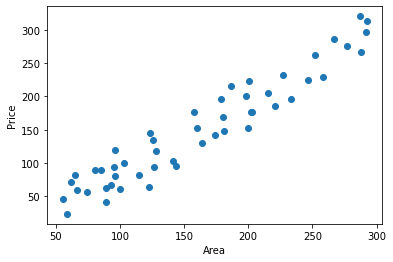

In [43]:
plt.scatter(house_area, house_price)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

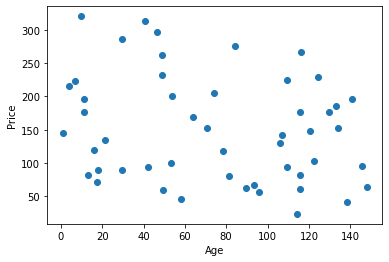

In [44]:
plt.scatter(house_age, house_price)
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

**Are the generated data and ground truth function realistic?**

- Yes, they are. The ground truth function depends linearly on both Area and Age, but the Area has a greater coefficient than the Age (1.1 > 0.5). Also, the values for the area are greater than those for the age. Thus, the plot Price vs Area shows a more linear relation than that of Price vs Age.

Now let's do a linear regression! We will assume there is no intercept, i.e. $f(\mathbf{x}) = \mathbf{w}^\top\mathbf{x}$ (there is no additional $w_0$ term)

Given the parameters $\mathbf{w} = (w_1,w_2)^\top$ and the training data $\mathbf{X}$,
predictions can be made with $\hat{\mathbf{y}} = \mathbf{Xw}$

In [45]:
w = np.array([2,2]) # as a start
X = training_data

In [46]:
predictions = X.dot(w)

**Implement a function which provides the mean square error
$J(\mathbf{w}) = \frac{1}{N}  \lVert \mathbf{y} - \mathbf{Xw} \rVert_2^2$
given the training data, labels and model parameters.**

In [47]:
def calc_MSE(w,X,y):
    calc =(1/N)*np.sum(np.square(y-X.dot(w)))
    return calc

**What is $\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}}$?**

In [48]:
y = house_price

In [49]:
Derivative = (2/N)*X.T.dot(X.dot(w)-y)

**Implement gradient descent:
$\mathbf{w}_{(t)} = \mathbf{w}_{(t-1)} - \alpha \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}}$**

**Determine suitable values for the parameters $\mathbf{w}$ using gradient descent on the training set.**

**Print the training error at each step. Is the training error decreasing? If not, try different values of $\alpha$.**

In [50]:
def gradient_descent(X,y,w,learning_rate=0.01,iterations=100):
    for i in range(iterations):
        #predictions = np.dot(X,w)
        w = w - (2/N)*learning_rate*(X.T.dot((X.dot(w)-y)))
        print("Training Error: {}".format(calc_MSE(w,X,y)))
    return w

In [51]:
lr = 0.000001 #Learning Rate
n_iter = 2000 #Number of Iterations

w = np.array([2,2]) # as a start

X = training_data
y = house_price
w = gradient_descent(X,y,w,lr,n_iter)

Training Error: 105381.4286950627
Training Error: 91769.28789017533
Training Error: 80053.03822673431
Training Error: 69967.1880018132
Training Error: 61283.43764712765
Training Error: 53805.46943215294
Training Error: 47364.46708613946
Training Error: 41815.26308349712
Training Error: 37033.025662163964
Training Error: 32910.40996288512
Training Error: 29355.108269947275
Training Error: 26287.743442595398
Training Error: 23640.057458989355
Training Error: 21353.353729904527
Training Error: 19377.157631159247
Training Error: 17668.064684152472
Training Error: 16188.750096582538
Training Error: 14907.117058136682
Training Error: 13795.564352741832
Training Error: 12830.35657212574
Training Error: 11991.082557104228
Training Error: 11260.189706629157
Training Error: 10622.583526159644
Training Error: 10065.283275873851
Training Error: 9577.125859604124
Training Error: 9148.511196374388
Training Error: 8771.183263175291
Training Error: 8438.04181173582
Training Error: 8142.980462122001
Tr

Training Error: 44.376793286297556
Training Error: 44.37679280816113
Training Error: 44.37679233464274
Training Error: 44.37679186569769
Training Error: 44.376791401281935
Training Error: 44.37679094135154
Training Error: 44.3767904858634
Training Error: 44.37679003477452
Training Error: 44.37678958804241
Training Error: 44.376789145624926
Training Error: 44.376788707480486
Training Error: 44.376788273567826
Training Error: 44.37678784384602
Training Error: 44.376787418274574
Training Error: 44.37678699681348
Training Error: 44.37678657942294
Training Error: 44.37678616606376
Training Error: 44.37678575669692
Training Error: 44.376785351283864
Training Error: 44.37678494978642
Training Error: 44.37678455216684
Training Error: 44.37678415838757
Training Error: 44.37678376841148
Training Error: 44.37678338220195
Training Error: 44.3767829997226
Training Error: 44.37678262093729
Training Error: 44.37678224581048
Training Error: 44.376781874306744
Training Error: 44.376781506391126
Trainin

In [52]:
w

array([-0.44720082,  1.12725779])

The training error should be much lower than at the start.

**Plot the fitted curve for each of the two parameters in the fitted $\mathbf{w}$.**

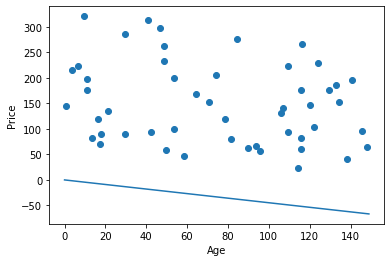

In [53]:
plt.scatter(house_age, house_price)
plt.xlabel('Age')
plt.ylabel('Price')

age_range = np.arange(0,150,1)
predictions = w[0] * age_range
plt.plot(age_range, predictions)

plt.show()

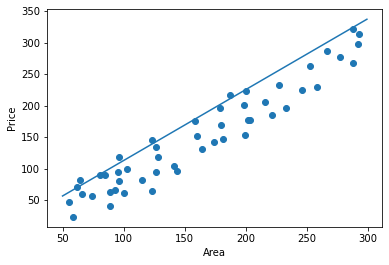

In [54]:
plt.scatter(house_area, house_price)
plt.xlabel('Area')
plt.ylabel('Price')

area_range = np.arange(50,300,1)
predictions = w[1] * area_range
plt.plot(area_range, predictions)

plt.show()

**Now use the closed-form solution to obtain good values for the parameters $\mathbf{w}$ using the training set.**

In [55]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

**Display the exact values of the parameters $\mathbf{w}$.
Are they the same as the one you obtained from gradient descent?
Are they the same as the ground truth values? Why?**

In [56]:
w

array([-0.44730823,  1.12730327])

- These values of w are practically the same as the ones calculated using the gradient descent method, which makes sense.
- Howerver, they are not the same as the values from the ground truth function because we are using an algorithm to approximate as much as possible to the original values, but will never have the exact same values. Thus, there will always be some error.

In practice, a machine learning engineer does not waste time implementing standard algorithms.
Scikit-learn provides an implementation of a linear regression, among many other learning algorithms.

*(Obviously, YOU are not wasting time, because you are learning. Implementing a linear regression is something everyone should do at least once in their life).*

**Look at the documentation from scikit-learn, and train a linear regression on our data using the provided implementation.
Look at the coefficients $\mathbf{w}$. Is it the same as the one you found? Is it the same as the ground truth?**

In [57]:
from sklearn import linear_model

In [58]:
X = training_data
y = house_price

In [59]:
regr = linear_model.LinearRegression()

In [60]:
regr.fit(X,y)

LinearRegression()

In [61]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-0.50560258  1.07341215]


- The coefficients w are similar to the ones obtained using gradient descent and the closed-form solution because the linear regression model from scikit learn minimizes the residual sum of squares between our original data and the predicted data from the linear approximation.
- However, they still do not match exactly the coefficients from the ground truth function because this is just an approximation.